In [1]:
# Example of making predictions
import csv
import numpy as np 
import pandas as pd
import collections
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [8]:
class Weather:
    itNum = 500
    alpha = 0.00001   #learning rate
    np.random.seed(10)
    theta = np.random.rand(10)

    def meanSquareError(self, x, y, m):
        prediction = np.dot(x, self.theta) 
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        derivative = np.dot(x.T, error)
        return cost, derivative, "Mean square error"

    def meanAbsError(self, x, y):
        prediction = np.dot(x, self.theta) 
        error = prediction - y
        cost = np.sum(np.abs(error))
        derivative = np.dot(x.T, np.sign(error))
        return cost, derivative, "Mean absolute error"

    def gradient_descent(self, trainData, errType):
        x = trainData[:,0:10]
        y = trainData[:,10]
        m, n = trainData.shape
        cost_list = []
        for i in range(0, self.itNum):
            if errType == "MSqr":
                 # Mean square error
                cost, derivative, errType = self.meanSquareError(x, y, m)
            elif errType == "Mabs" :
            # Mean absolute error
                cost, derivative, errType = self.meanAbsError(x, y)
            # Mean absolute percentage error not tried due to zero division
            cost_list.append(cost)
            self.theta = self.theta - (self.alpha * (1/m) * derivative) 

        return cost_list

    def prepData(self, trainData):
        trainData['Precip Type'] = trainData['Precip Type'].fillna('null')
        dummy = pd.get_dummies(trainData['Precip Type'])
        rtrainData = trainData.drop(['Precip Type'], axis = 1) 
        trainData = pd.concat([rtrainData,dummy], axis=1)
        # trainData.head()
        tData = np.array(trainData.values)
#         print("shape ", tData.shape)
        trnData = np.delete(tData, 0, axis=0) 
        r,c = trnData.shape

        y = trnData[:,4]
        z = trnData[:,[10,11,12]]
        x = np.delete(trnData, [0,1,3,9,10,11,12], axis=1) 

        x = x.astype(int)
        y = y.astype(int)
        z = z.astype(int)
        x_normed = (x - x.min(0)) / x.ptp(0)
        trainData = np.c_[ x_normed, z ]
        trainData = np.c_[trainData, y]
        trainData = np.c_[ np.ones(r), trainData ] 
#         print("final training data ", trainData.shape)
        # trainData = np.concatenate((trainData, np.ones(r).T),axis=1)
        return trainData

    def validate(self, validateData):
        x = validateData[:,0:10]
        y = validateData[:,10]
        predictions = np.dot(x, self.theta)
        self.stats(y, predictions)

    def stats(self, test_labels, predictions ):
        print ("Mean squared error", mean_squared_error(test_labels, predictions))
        # print ("Accuracy score", accuracy_score(test_labels, predictions))
        print ("Mean absolute error", mean_absolute_error(test_labels, predictions))

    def train(self, DataFile, errType):
#         print("sdv ", DataFile)
        trainData = pd.read_csv(DataFile) 

        trainData = self.prepData(trainData)
#         print("trainData shape", trainData.shape)
        validateData = trainData[0:2000]
        trainData = trainData[2000:]
        print("Error type ",errType)
        cost_list = self.gradient_descent(trainData, errType)

        print("No of iterations ", self.itNum)
        fig,ax =  plt.subplots(figsize=(10, 10))
        x = np.arange(1,self.itNum+1)
        x = np.array(x)
        ax.plot(x, cost_list)
        ax.set_title(errType)
        plt.show()

        self.validate(validateData)
        return self.theta


    def predict(self, TestFile):
        with open(TestFile,'r') as fT:
            readerT  = csv.reader(fT, quoting=csv.QUOTE_NONNUMERIC)
            TestData = np.array(list(readerT))
            TestData = self.prepData(TestData)

Error type  Mabs
No of iterations  500


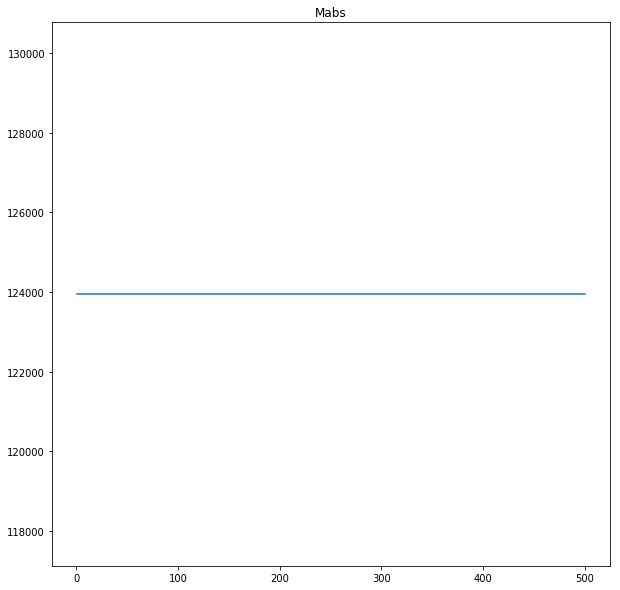

Mean squared error 2.6011149575531283
Mean absolute error 1.597518076670363


In [9]:
model = Weather()
coeff = model.train('./Question-4/weather.csv',"Mabs")

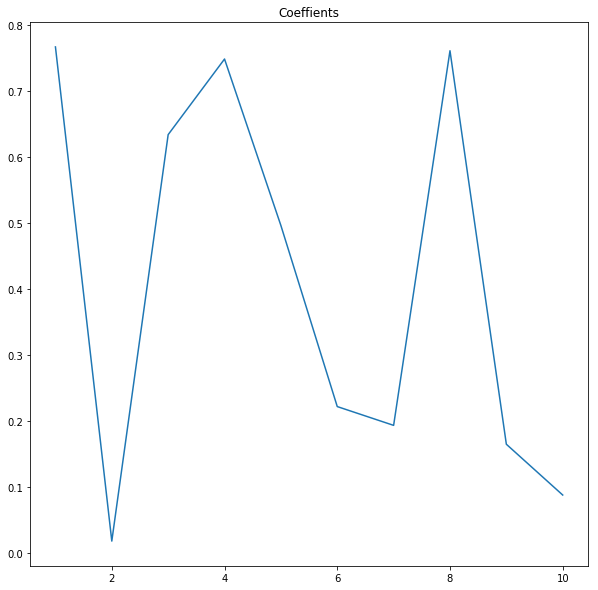

In [13]:
fig1,ax1 =  plt.subplots(figsize=(10, 10))
x1 = np.arange(1,len(coeff)+1)
x1 = np.array(x1)
ax1.plot(x1, coeff)
ax1.set_title("Coeffients")
plt.show()

Error type  MSqr
No of iterations  500


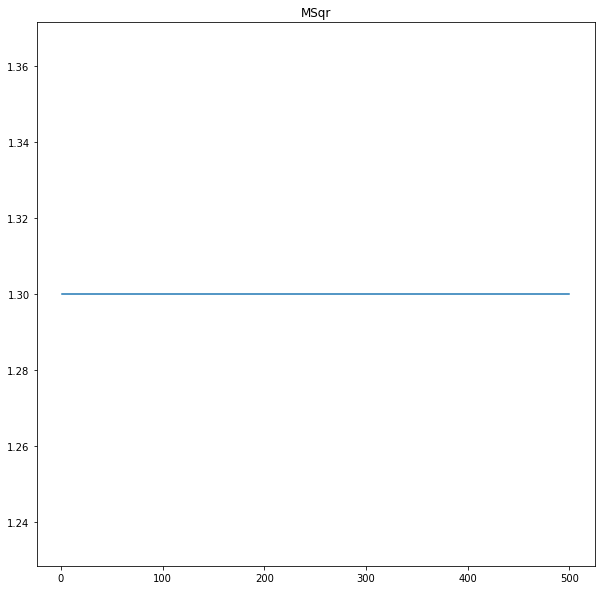

Mean squared error 2.415318921418235
Mean absolute error 1.539121792649331


In [15]:
coeff = model.train('./Question-4/weather.csv',"MSqr")

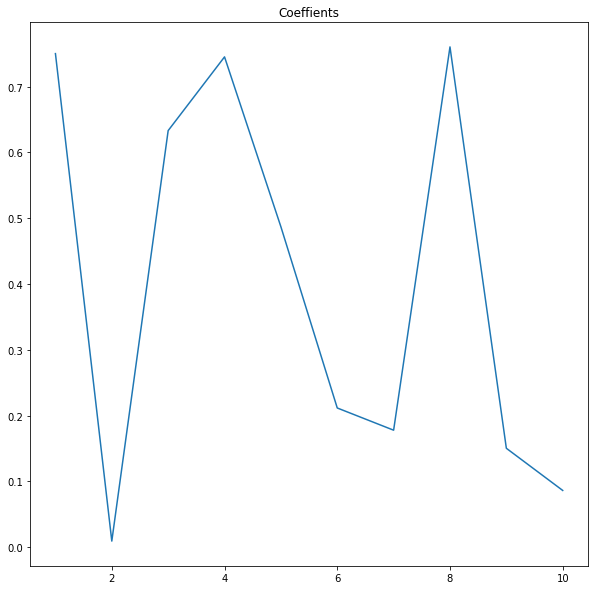

In [16]:
fig2,ax2 =  plt.subplots(figsize=(10, 10))
x2 = np.arange(1,len(coeff)+1)
x2= np.array(x2)
ax2.plot(x2, coeff)
ax2.set_title("Coeffients")
plt.show()

For both error functions, Mean absolute error and mean square error, the difference in cost is not of large significance over the iterations. But the mean Square error is relatively smaller when compared to absolute error.Also the coeffients are plotted. 